In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris_path = './iris_data.csv'

In [127]:
iris_df = pd.read_csv(iris_path)
iris_df.shape

(150, 5)

In [128]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [129]:
setosa_df = iris_df[iris_df['variety']=='Setosa']
virginica_df = iris_df[iris_df['variety']=='Virginica']
versicolor_df = iris_df.loc[iris_df['variety']=='Versicolor']
versicolor_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


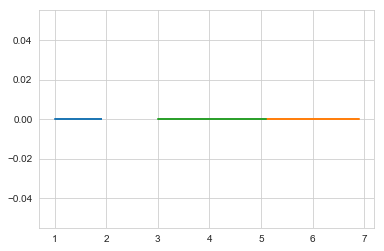

<Figure size 1080x432 with 0 Axes>

In [130]:
#What about 1-D scatter plot using just one feature ?
#1-D scatter plot of petal-length
plt.plot(setosa_df['petal.length'],np.zeros_like(setosa_df['petal.length']))
plt.plot(virginica_df['petal.length'],np.zeros_like(virginica_df['petal.length']))
plt.plot(versicolor_df['petal.length'],np.zeros_like(versicolor_df['petal.length']))
plt.figure(figsize=(15,6))
plt.show()

In [131]:
#Disadvantages of 1-D scatter plot :
#very hard to make sense as points
#are overlapping a lot
#Are there better ways of visualizing 1-D scatter plots ?

# Histogram, PDF(ProbabilityDensityFunc), CDF(Cumulative Density Func)

In [132]:
#1D - Univariate anaylsis - histogram
#2D - Bi-variate analysis - scatter, bar, ..etc
#3D -
#4D - Instead of it , we can use pair plot

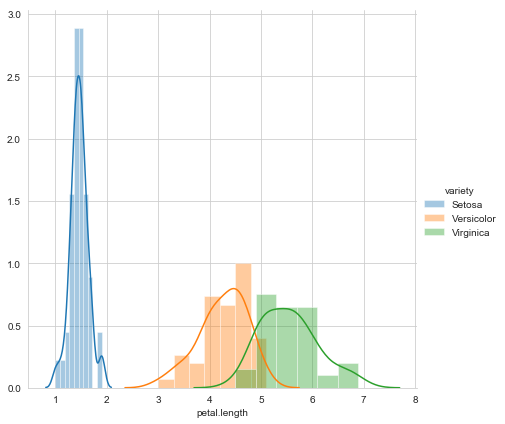

<Figure size 1080x1296 with 0 Axes>

In [133]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_df,hue="variety",height=6)\
    .map(sns.distplot,"petal.length")\
    .add_legend();
plt.figure(figsize=(15,18))
plt.show()

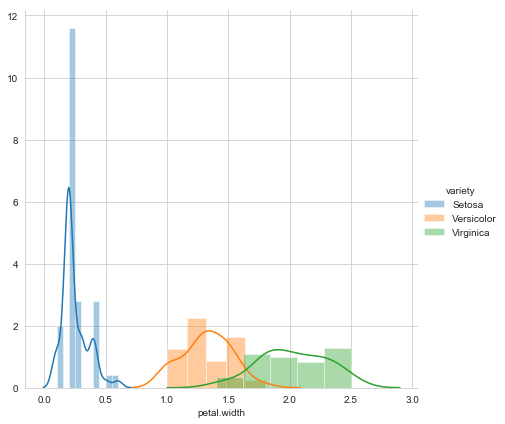

<Figure size 1080x1296 with 0 Axes>

In [134]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_df,hue="variety",height=6)\
    .map(sns.distplot,"petal.width")\
    .add_legend();
plt.figure(figsize=(15,18))
plt.show()

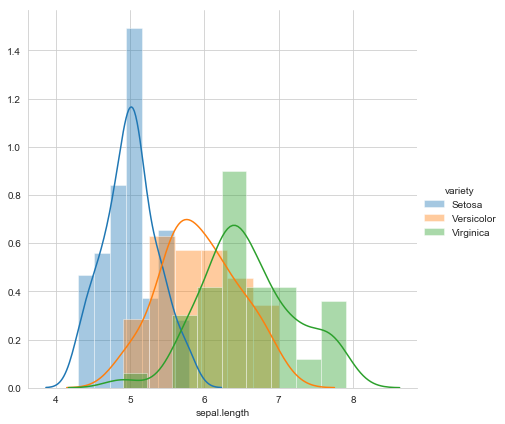

<Figure size 1080x1296 with 0 Axes>

In [135]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_df,hue="variety",height=6)\
    .map(sns.distplot,"sepal.length")\
    .add_legend();
plt.figure(figsize=(15,18))
plt.show()

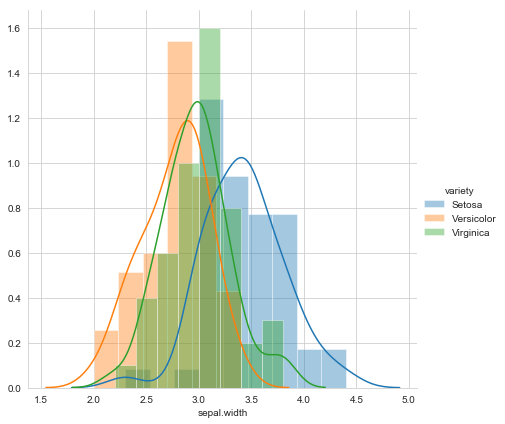

<Figure size 1080x1296 with 0 Axes>

In [136]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_df,hue="variety",height=6)\
    .map(sns.distplot,"sepal.width")\
    .add_legend();
plt.figure(figsize=(15,18))
plt.show()

CONCLUSIONS :
1. After understanding this univariate analysis, if i would choose one variable (feature) for model creation either statistially or mathematicallly or programatically or rules based Petal length is very good feature to distinguish 3 varities
2. if we want to choose 2 features, PL and PW are the very useful features
3. if we want to choose 3 features, PL,PW and SL are the useful attributes.
4. so on the conclusion PL >> PW >> SL >> SW are the relation among all of these.

In [137]:
counts ,bin_edges = np.histogram(setosa_df['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


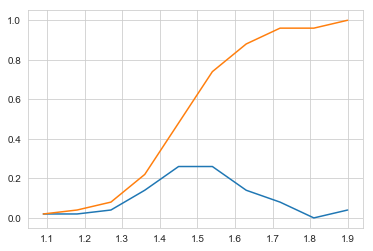

In [138]:
#COMPUTE CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

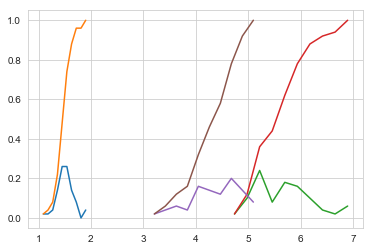

<Figure size 1080x1152 with 0 Axes>

In [139]:
#Plots of CDF of petal_lenght for various types of flowers
#MisClassification error if you use petal_length only.

#setosa 
counts ,bin_edges = np.histogram(setosa_df['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#virginica
counts ,bin_edges = np.histogram(virginica_df['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#versicolor
counts ,bin_edges = np.histogram(versicolor_df['petal.length'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.figure(figsize=(15,16))
plt.show()

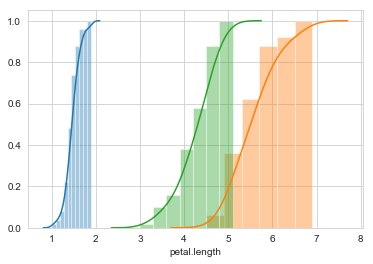

<Figure size 1080x1296 with 0 Axes>

In [140]:
sns.distplot(setosa_df['petal.length'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

sns.distplot(virginica_df['petal.length'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

sns.distplot(versicolor_df['petal.length'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.figure(figsize=(15,18))
plt.show()

In [142]:
# Setosa Frequency
stats_df = setosa_df \
.groupby('petal.length') \
['petal.length'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'petal.length': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,petal.length,frequency,pdf,cdf
0,1.0,1,0.02,0.02
1,1.1,1,0.02,0.04
2,1.2,2,0.04,0.08
3,1.3,7,0.14,0.22
4,1.4,13,0.26,0.48
5,1.5,13,0.26,0.74
6,1.6,7,0.14,0.88
7,1.7,4,0.08,0.96
8,1.9,2,0.04,1.00


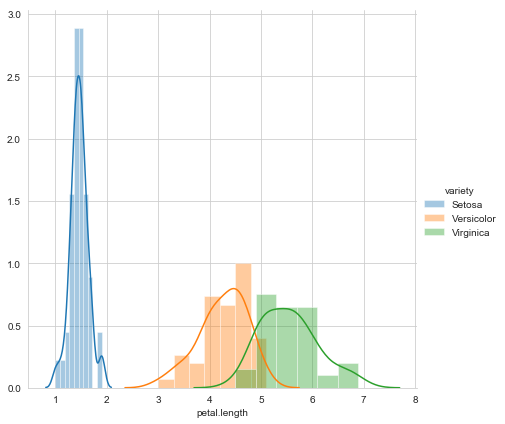

<Figure size 1080x1296 with 0 Axes>

In [118]:
sns.set_style("whitegrid")
sns.FacetGrid(iris_df,hue="variety",height=6)\
    .map(sns.distplot,'petal.length')\
    .add_legend()
plt.figure(figsize=(15,18))
plt.show()

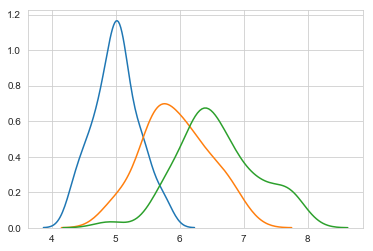

In [113]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

# Sort the dataframe by target
target_0 = iris.loc[iris['target'] == 0]
target_1 = iris.loc[iris['target'] == 1]
target_2 = iris.loc[iris['target'] == 2]

sns.distplot(target_0[['sepal length (cm)']], hist=False, rug=False)
sns.distplot(target_1[['sepal length (cm)']], hist=False, rug=False)
sns.distplot(target_2[['sepal length (cm)']], hist=False, rug=False)
